# 고객 분류 (Kmeans) - Part2

Kmeans Clustering을 활용하여, 데이터 기반의 고객 Segment 분류

Kmeans 원리
- 데이터 포인트가 K개의 클러스터로 나뉨 : 데이터 포인트가 랜덤하게 부여된 K개의 클러스터로 나뉘고 각 클러스터에는 하나의 중심이 존재
- 최소 거리 원칙 : 각 관측치는 가장 가까운 클러스터 중심에 할당됨
- 클러스터 중심의 이동 : 클러스터에 속한 데이터 포인트의 평균 위치로 중심이 이동
- 반복 과정 : 클러스터 할당 및 중심 업데이트를 반복하여 최종 클러스터링 결과를 도출

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
## 한글 폰트 설정
import os
os.name

import os
if os.name == 'posix' :
    plt.rc('font', family='AppleGothic')    # 맥
else:
    plt.rc('font', family='Malgun Gothic')  # 윈도우

# 마이너스 폰트 깨지는 문제애 대한 대처
plt.rc('axes', unicode_minus=False)

# 레티나 설정을 해주면 글씨가 더 선명해짐
%config InlineBackend.figure_font = 'retina'

In [3]:
# 데이터 불러오기
df = pd.read_csv("Mall_Customers.csv", index_col=0)

print(df.shape)
df.head()

(200, 4)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
# 변수 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
# 수치형 데이터 확인
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Gender'], drop_first=True).applymap(lambda x : int(x) if isinstance(x, bool) else x)
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


In [7]:
## KMeans
from sklearn.cluster import KMeans

# 객체 생성
model = KMeans(n_clusters=3)

# 모델 적합
model.fit(df)

KMeans(n_clusters=3)

In [8]:
# 레이블 확인
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [9]:
# 데이터 프레임으로 변환
result_df = df.copy()

result_df['label'] = model.labels_
result_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,1
2,21,15,81,1,1
3,20,16,6,0,1
4,23,16,77,0,1
5,31,17,40,0,1


In [10]:
result_df.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,48.344828,67.022989,30.977011,0.459770
1,30.932432,39.270270,55.972973,0.405405
2,32.692308,86.538462,82.128205,0.461538


In [11]:
result_df['label'].value_counts()

label
0    87
1    74
2    39
Name: count, dtype: int64

# 최적의 k값 찾기 - Elbow Method

In [12]:
# cluster별 inertia 확인
distance = []

for i in range(2, 11) :
    model = KMeans(n_clusters=i)
    model.fit(df)
    distance.append(model.inertia_)

distance

[219862.21754385962,
 143391.59236035674,
 104414.67534220166,
 85679.73322625125,
 58350.65449462818,
 51169.25976088792,
 44391.820804870804,
 41956.22340367964,
 39333.75663780663]

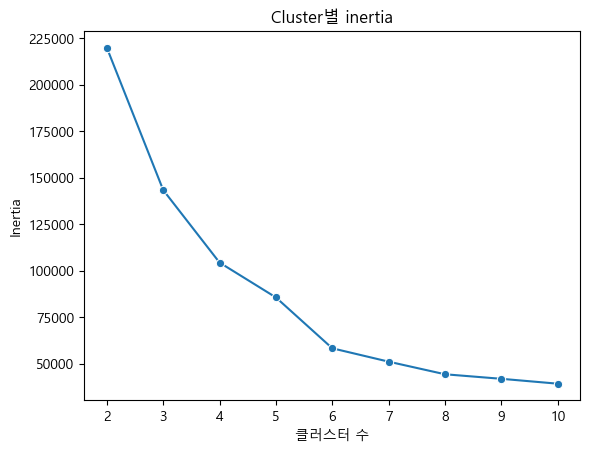

In [13]:
# 시각화 → 애매함
sns.lineplot(x=list(range(2, 11)), y=distance, marker='o')

plt.title('Cluster별 inertia')
plt.xlabel('클러스터 수')
plt.ylabel('Inertia')
plt.show()

# 최적의 k값 찾기 - 실루엣 값(Silhouette Value)

- 데이터 포인트가 속한 클러스터와 다른 클러스터 간의 거리를 비교하여 클러스터링의 품질을 평가하는 지표
- 잘된 클러스터링은 각각의 클러스터간의 거리가 멀다 (특성이 다르니까)
- silhouette value는 cluster가 무작정 늘어날수록 값이 더 나아지지는 않음
- 값이 클수록 더 좋은 값

In [14]:
from sklearn.metrics import silhouette_score

silhouette_score(df, model.labels_)

0.39439633373080213

In [15]:
# cluster별 silhouette_score 확인
sil = []

for i in range(2, 11) :
    model = KMeans(n_clusters=i)
    model.fit(df)
    sil.append(silhouette_score(df, model.labels_))

sil

[0.3237761091714519,
 0.33545193002465656,
 0.40553486600451777,
 0.37688936241822546,
 0.4168101889109398,
 0.43479758148661335,
 0.41912608494830605,
 0.383926837974386,
 0.38156241910451816]

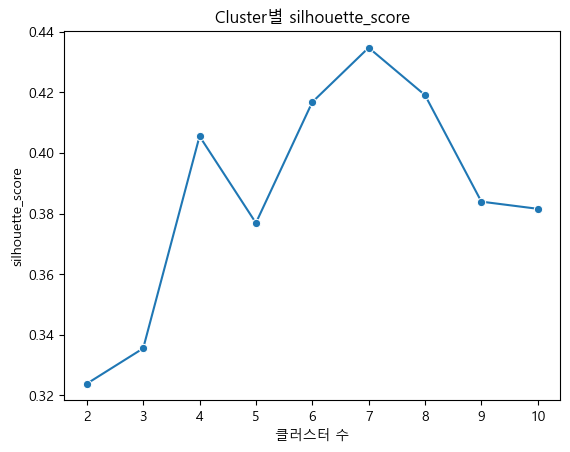

In [16]:
# 시각화 → cluster6이 제일 좋은 score를 가짐
sns.lineplot(x=list(range(2, 11)), y=sil, marker='o')

plt.title('Cluster별 silhouette_score')
plt.xlabel('클러스터 수')
plt.ylabel('silhouette_score')
plt.show()

# 최종 모델링

In [17]:
## cluster 6개로 모델링
model = KMeans(n_clusters=6)
model.fit(df)

df['label'] = model.labels_

# 확인
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,3
2,21,15,81,1,1
3,20,16,6,0,3
4,23,16,77,0,1
5,31,17,40,0,3


In [18]:
df.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,53.823529,54.725490,48.980392,0.411765
1,24.800000,41.460000,63.700000,0.400000
2,40.529412,82.647059,18.764706,0.529412
3,44.318182,25.772727,20.272727,0.409091
4,32.692308,86.538462,82.128205,0.461538
5,39.250000,124.000000,17.500000,0.500000


<Axes: xlabel='label', ylabel='Age'>

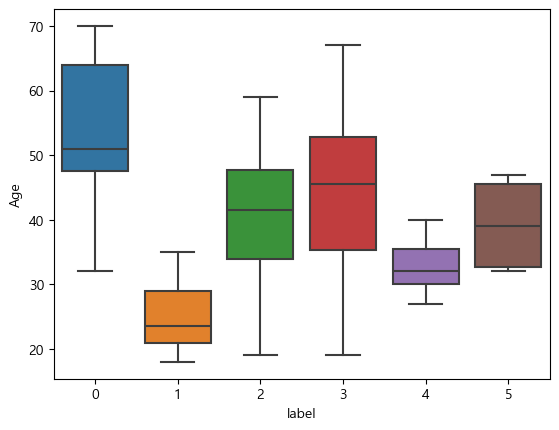

In [19]:
sns.boxplot(data=df, x='label', y='Age')

<Axes: xlabel='label', ylabel='Annual Income (k$)'>

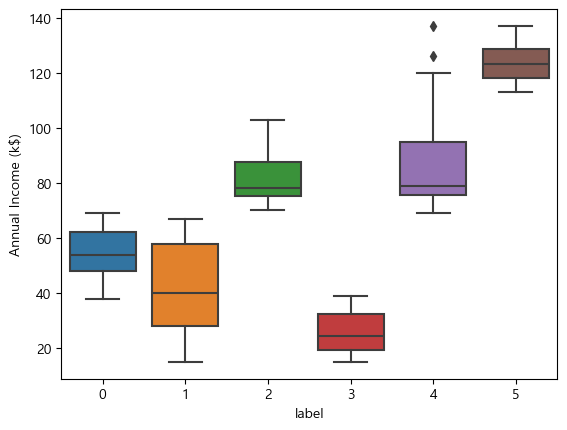

In [20]:
sns.boxplot(data=df, x='label', y='Annual Income (k$)')

<Axes: xlabel='label', ylabel='Spending Score (1-100)'>

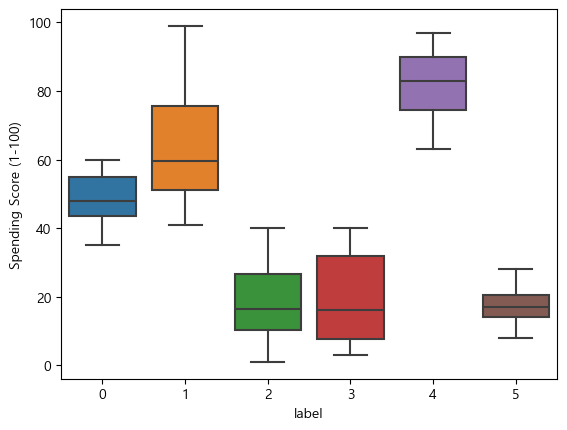

In [21]:
sns.boxplot(data=df, x='label', y='Spending Score (1-100)')

# 주성분 분석 (PCA)

4개의 독립 변수를 원하는 갯수로(2개) 줄이기

In [22]:
df.drop('label', axis=1, inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


In [23]:
from sklearn.decomposition import PCA

# 객체 생성
pca = PCA(n_components=2)

# 모델 적합
pca.fit(df)

PCA(n_components=2)

In [24]:
# 확인
pca_df = pd.DataFrame(pca.transform(df), columns=['PC1', 'PC2'])

print(pca_df.shape)
pca_df.head()

(200, 2)


,PC1,PC2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412


<Axes: xlabel='PC1', ylabel='PC2'>

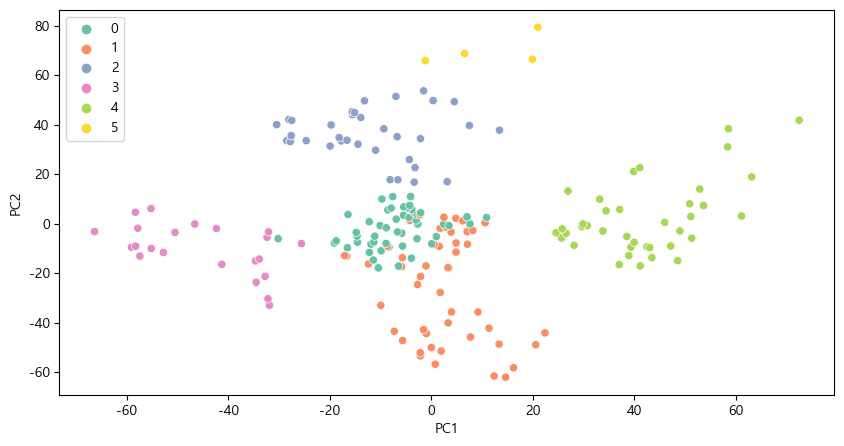

In [25]:
# 시각화
plt.figure(figsize=(10, 5))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=model.labels_, palette='Set2')